# EDA의 의미

## EDA의 의미
- 데이터의 특징과 데이터의 내재된 관계 이해
- 자료들의 유형과 범위, 수준 확인
- 분포의 범위 고찰
- 주제 : 
    - 저항성 강조 : 이상치 등 부분적인 변동에 대한 민감성
    - 잔차 계산 : 관찰 값들이 주 경향에서 벗어난 정도
    - 자료변수의 재표현 : 변수를 적당한 척도로 바꾸는 것
    - 그래프를 통한 현시성 : 분석 결과를 이해하기 쉽게 시각화

# 막대그래프와 히스토그램

## 막대그래프

범주형 데이터를 요약하고 시각적으로 비교하는데 효과적인 그래프

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)

In [2]:
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

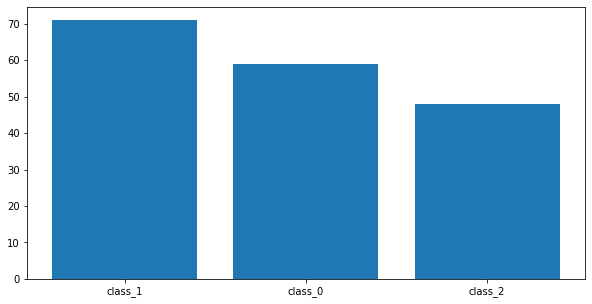

In [5]:
plt.figure(figsize=(10,5))
plt.bar(wine_type.index, wine_type.values, width=0.8, bottom=None, align='center');

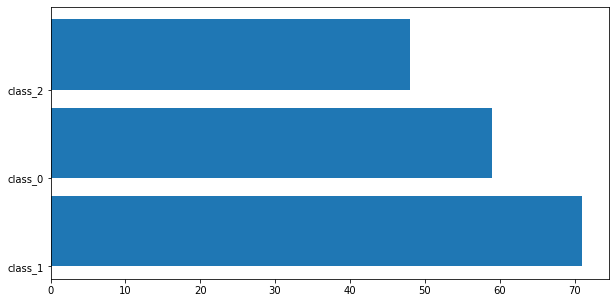

In [7]:
plt.figure(figsize=(10,5))
plt.barh(wine_type.index, wine_type.values, height=0.8, left=None, align='edge'); # 가로형 horizontal 로도 비교 가능

## 히스토그램
연속된 / (서로 겹치지 않는 범주) 구간 에 대한 데이터의 빈도수를 표현한다.

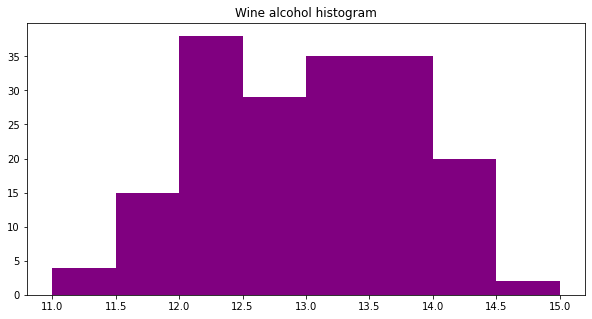

In [8]:
plt.figure(figsize=(10,5))
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins=8, range=(11, 15), color='purple', data=wine);

# 상자 그림 (Box plot)
- 사분위수를 이용하여 수치형 변수의 값의 분포를 확인하는 그래프
<br>
<img src="img/boxplot.png" width="500"/>

## 상자 그림의 해석
### 상자
- 상자는 값의 50%
- 상자의 윗면과 아랫면은 25%
- 상자의 크기로 값의 퍼진 정도 확인
- 상자의 중앙의 선은 중앙값, 중앙값이 어느쪽으로 치우쳐 있는지 확인 가능

### IQR
- Inter Quatile Range, 중앙 50%의 퍼진 정도
- 제3분위수와 제1분위수의 차

### 수염(Whisker)
- Q1-1.5*IQR 부터 Q3+1.5*IQR
- 수염을 벗어나는 값을 이상치로 표현 

## 상자 그림 그리기

### iris 데이터의 변수들로 상자 그림 그리기

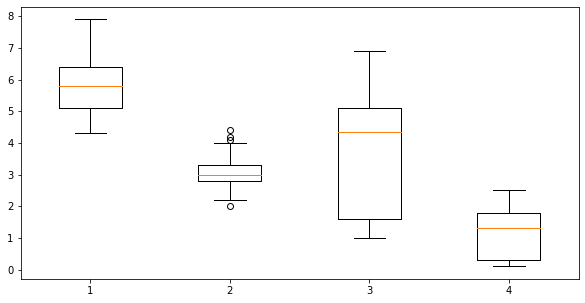

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

plt.boxplot(iris.drop(columns='class'))
plt.show()

### 하나의 컬럼만 하나의 boxplot으로 표현
- IQR에 곱할 숫자도 옵션으로 설정 가능

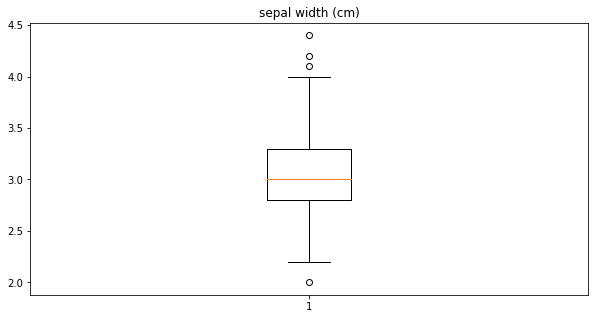

In [10]:
plt.figure(figsize=(10,5))

plt.boxplot(iris['sepal width (cm)'], whis=1.5)
plt.title('sepal width (cm)')
plt.show()

### 한 컬럼을 카테고리 변수에 따라 분리 하여 그리기

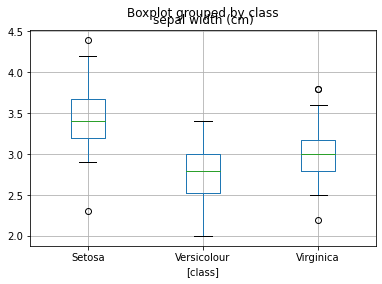

In [17]:
iris[['sepal width (cm)', 'class']].boxplot(by='class')
plt.show()

### 한 컬럼을 카테고리 변수에 따라 분리 하여 그리기 (seaborn)

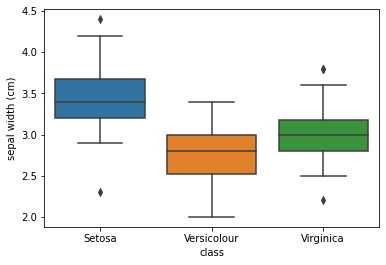

In [15]:
import seaborn as sns
sns.boxplot(x='class', y='sepal width (cm)', data=iris)
plt.show()


# 산점도 (Scatter plot)
- Scatter plot은 두 개의 수치형 변수 각각의 분포와 두 변수의 관계 확인

## Scatter Plot의 해석
### 관계의 유형
- 두 변수의 관계의 유형과 강도
    - 양의 상관관계
    - 음의 상관관계
    - 상관관계 없음
    - 비선형관계
### 관계의 강도
- 데이터가 적합선에 얼마나 가깝게 모여 있는가

## Scatter Plot 그리기
### iris 데이터로 scatter plot 그리기

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

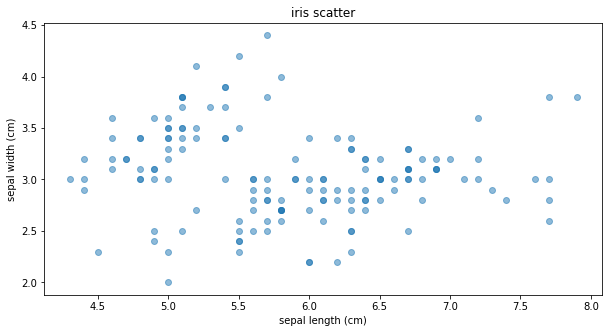

In [21]:
plt.figure(figsize=(10,5))
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], alpha=.5)
plt.show()

### 한 컬럼을 카테고리 변수에 따라 색 분리하여 표현

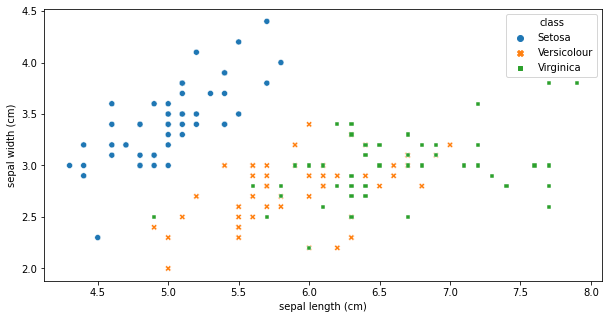

In [22]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='class', style='class')
plt.show()

# 선 그래프
## 수평선·수직선 그래프
- 그래프의 한계점, 평균값 표시에 사용
- 수평선은 hlines(), 수직선은 vlines()

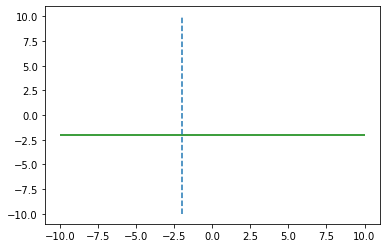

In [26]:
import matplotlib.pyplot as plt
# plt.hlines(-6, -10, 10, color='grey')
plt.hlines(-2, -10, 10, color='green')
# plt.hlines(2, -10, 10, color='orange')
# plt.hlines(6, -10, 10, color='red')
# plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
# plt.vlines(2, -10, 10, linestyles='dashdot')
# plt.vlines(6, -10, 10, linestyles='dotted')
plt.show()

## 함수식 그래프
- plt.plot(x, y) 시 선그래프가 default
- y의 값을 함수식으로 만들어 그려 본다

In [31]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [28]:
def linear_func(x):
    return 2*x +1

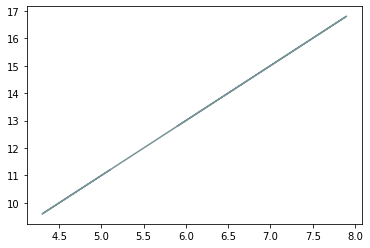

In [29]:
X = iris['sepal length (cm)']
plt.plot(X, linear_func(X), c='#789395')
plt.show()

## 회귀선 그래프
- np.polyfit() 함수로 회귀식을 입력하여 회귀선을 그릴 수 있다.
- np.polyfit() 함수는, x, y, 차수 를 입력 받아 최소제곱 다항식에 적합 한다.

### 1차식 그리기
- iris 데이터로, x엔 'sepal length (cm)' y엔 'petal legnth (cm)' 인 산점도 및 회귀선 그리기

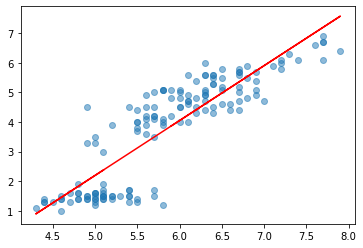

In [32]:
import numpy as np

X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X,Y,1) # 1차항의 변수로 받아옴.즉 기울기 및 상수항 받아올 수 있음
plt.scatter(x=X, y=Y, alpha=.5) # alpha로 투명도를 50% 적용
plt.plot(X, b1*X + b0, color='red')
plt.show()

### 2차식 그리기
- 1차식과 유사하나, 데이터를 x값에 대해 정렬 해야 한다.

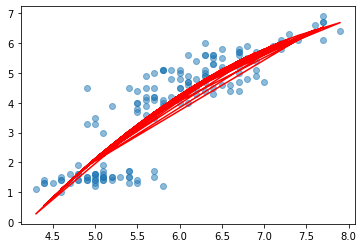

In [34]:
X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b2, b1, b0 = np.polyfit(X,Y,2)
plt.scatter(x=X, y=Y, alpha=.5)
plt.plot(X, b2*X**2+b1*X + b0, color='red')
plt.show()

x값을 정렬 하지 않은 상태에서는 다수의 회귀선이 보임

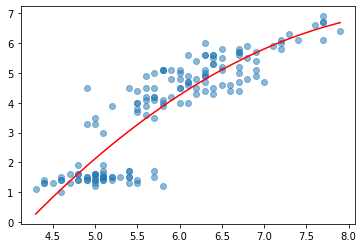

In [35]:
iris2 = iris.sort_values(by='sepal length (cm)') # x 를 오름차순으로 정렬

X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X,Y,2)
plt.scatter(x=X, y=Y, alpha=.5)
plt.plot(X, b2*X**2+b1*X + b0, color='red')
plt.show()

## 꺾은선 그래프
### 시간의 변화 표시
- 값을 점으로 표기하고, 점들을 선으로 연결
- X에 따른 Y의 변화를 보여 주기 위함으로, X의 정렬 필요

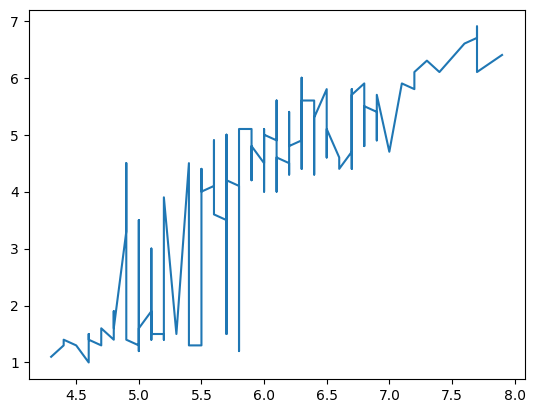

In [27]:
iris2 = iris.sort_values(by='sepal length (cm)')
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2)
plt.show()

### 카테고리에 따른 분리

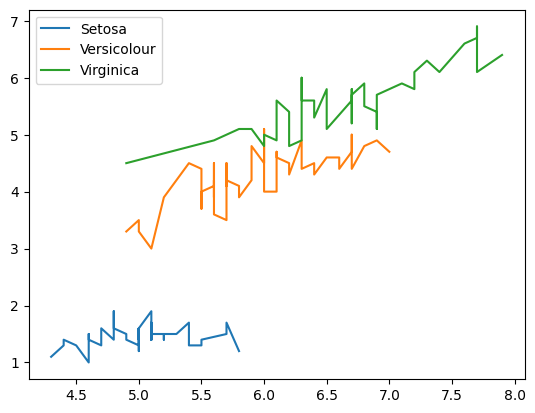

In [34]:
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['class']=='Setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['class']=='Versicolour'])
plt.plot('sepal length (cm)', 'petal length (cm)', data=iris2.loc[iris2['class']=='Virginica'])
plt.legend(iris2['class'].unique())
plt.show()

# 상관관계 시각화
- 2개 변수간의 선형 관계
- 모든 데이터 컬럼에 대한 상관관계 한번에 파악 가능 but 많은 시간 필요
## 산점도 행렬
- 두개 이상의 변수가 있는 데이터에서 변수들 간의 산점도를 그린 그래프
- 수량화된 정보는 제공하지 않음
- 데이터의 분포를 한번에 파악 가능
- 2차원 이상의 관계가 있는지 파악 가능
### 산점도 행렬 해석 방법
- 대각선에 표시된 히스토그램을 통해 이사잋 확인
- 종속변수와 설명 변수간의 관계 시각적 판단
- 종속변수가 수치형인 경우, 각 설명변수와의 직선 상관관계 비교
- 종속변수가 범주형인 경우, 종속변수를 잘 구분하는 변수 파악
- 설명변수 간의 직선 함수 관계 파악, 다중공선성 문제 진단
### 산점도 그리는 법
- scatter_matrix(data, alpha=.5, figsize=(8,8), diagonal='hist')

In [36]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix # 판다스에서도 산점도 행렬 확인 가능

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

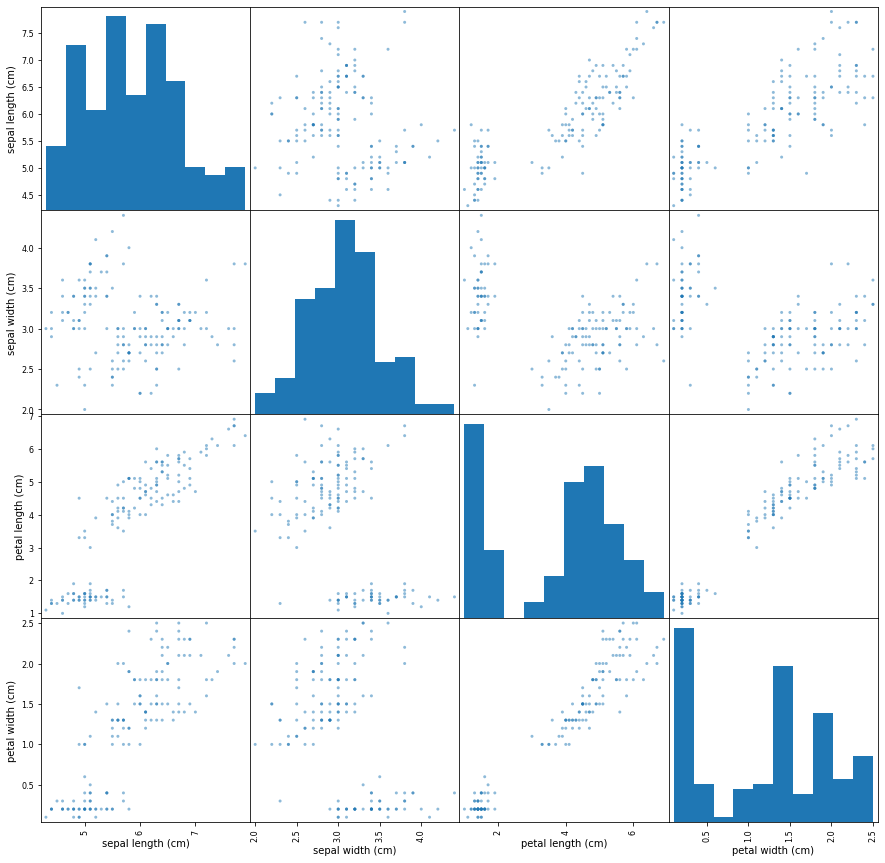

In [38]:
scatter_matrix(iris, alpha=.5, figsize=(15,15), diagonal='hist')
plt.show()

- 범주별 차이가 안나는 경우, target 별 색을 다르게 표현 가능
- sns.pairplot(data, diag_kind='auto',hue='target')

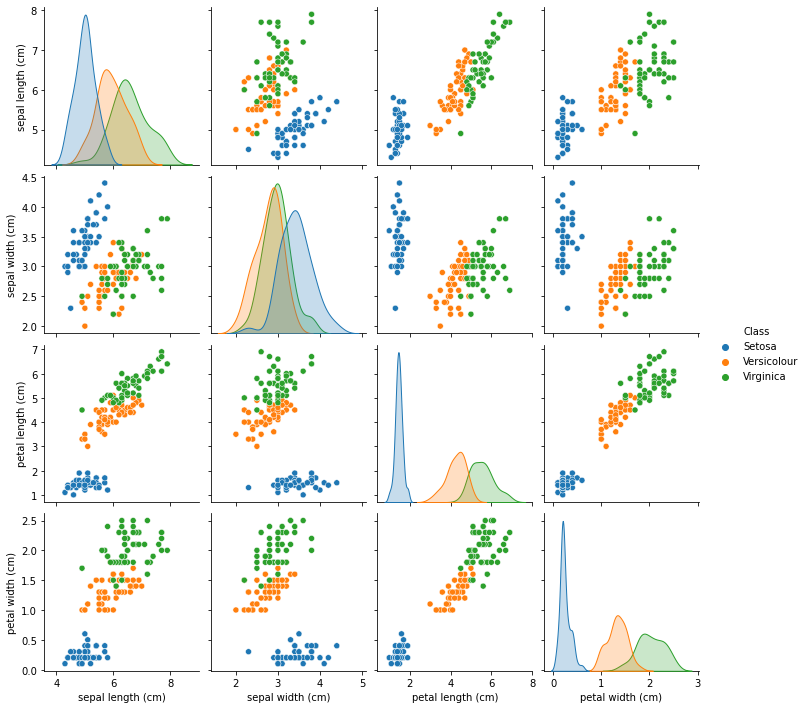

In [39]:
import seaborn as sns
sns.pairplot(iris, diag_kind='auto',hue='Class')
plt.show()

## 상관계수 행렬 그래프
- 다수의 변수간 상관관계 파악
- 독립 변수들간의 다중공선성 파악 에 사용

### 상관관계 해석하기
- -1~1 사이의 값
- 절대값이 0.4 이하는 거의 상관 없음
- 절대값이 0.8 이상이 강한 상관 관계
### 상관계수 행렬 시각화
- DataFrame의 corr() 함수로 상관 행렬 생성
- seaborn의 heatmap() 함수로 시각화


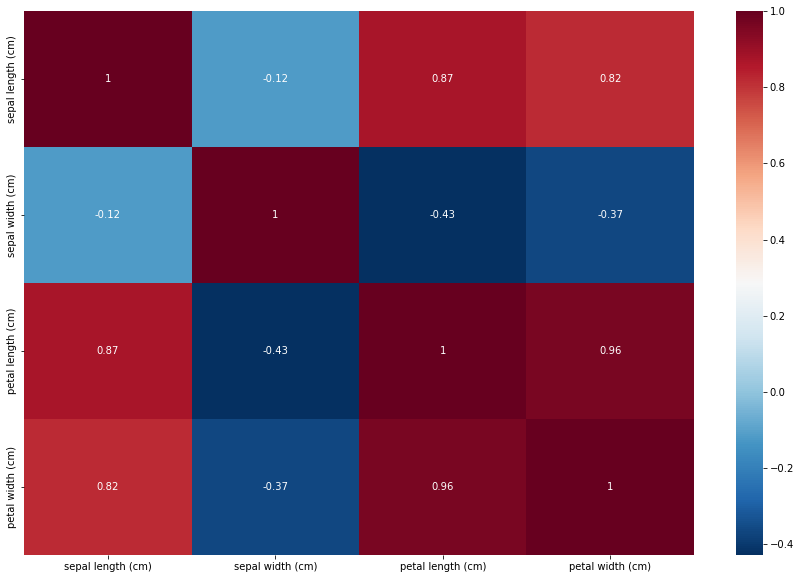

In [43]:
plt.figure(figsize=(15,10))

iris_corr = iris.drop(columns='Class').corr(method='pearson')
sns.heatmap(iris_corr, xticklabels=iris_corr.columns, yticklabels=iris_corr.columns, cmap='RdBu_r', annot=True)
plt.show()

# Pandas Profiling
- 데이터 프레임에 대한 탐색적 분석을 간단한 코드로 구현
- EDA의 수행 시간 줄일 수 있지만, 사용되는 버전의 특성을 타는 만큼, 시험장의 pandas 버전을 확인 할 필요 있음
- 시험시 쓸 수 있는지 부터 확인 해야 할 듯

## Pandas Profiling 제공기능
- Overviw : 통계 정보 및 컬럼의 체크 사항
- Variables : 통계 정보와 Null 정보, 히스토그램 및 막대 그래프
- Interactions : 컬럼쌍별 산점도
- Correlation : 상관계수 및 상관행렬 그래프
- Missing Values : 결측값
- Sample : 가장 처음과 마지막 10개 값
- Duplicate rows : 중복 행
## Pandas Profiling 수행

In [46]:
# !pip install pandas-profiling
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
ProfileReport(iris)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]